In [1]:
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [2]:
search_term = ("@BedBathBeyond", "@Target", "@Walmart","@WilliamsSonoma", "@amazon")

rows=[]

min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

rows=[]

for term in search_term:
        
    public_tweets = api.search(term, count=100, result_type="recent")    
    #print(json.dumps(public_tweets, indent = 2, separators=(',', ': ')))
    ctr=1
    for tweet in public_tweets["statuses"]:       
        print(">>> "+str(ctr)+" <<<")
        print(json.dumps(tweet, indent = 2, separators=(',', ': ')))
        ctr+=1
    
        if (tweet["user"]["followers_count"] < max_followers and
            tweet["user"]["statuses_count"] > min_tweets and
            tweet["user"]["statuses_count"] < max_tweets and
            tweet["user"]["friends_count"] < max_following and
            tweet["user"]["lang"] == lang):
            
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            positive = analyzer.polarity_scores(tweet["text"])["pos"]            
            neutral = analyzer.polarity_scores(tweet["text"])["neu"]
            negative = analyzer.polarity_scores(tweet["text"])["neg"]   
            txt=tweet["text"]
            dttm=datetime.strptime(tweet["created_at"] , '%a %b %d %H:%M:%S %z %Y')
                
            rows.append((term,txt,dttm,0,compound,positive,neutral,negative))        
    
sentim_df=pd.DataFrame(rows, columns=["Major Retailer","Tweet","DateTime","Tweets Ago","Compound", "Positive", "Neutral", "Negative"])


>>> 1 <<<
{
  "created_at": "Tue Sep 19 21:25:08 +0000 2017",
  "id": 910253447026495489,
  "id_str": "910253447026495489",
  "text": "Get up to a $50 gift card with purchase of select KitchenAid products at @BedBathBeyond https://t.co/siCMaVaieZ",
  "truncated": false,
  "entities": {
    "hashtags": [],
    "symbols": [],
    "user_mentions": [
      {
        "screen_name": "BedBathBeyond",
        "name": "Bed Bath & Beyond",
        "id": 372817561,
        "id_str": "372817561",
        "indices": [
          73,
          87
        ]
      }
    ],
    "urls": [
      {
        "url": "https://t.co/siCMaVaieZ",
        "expanded_url": "http://ow.ly/3lXV30f8Asq",
        "display_url": "ow.ly/3lXV30f8Asq",
        "indices": [
          88,
          111
        ]
      }
    ]
  },
  "metadata": {
    "iso_language_code": "en",
    "result_type": "recent"
  },
  "source": "<a href=\"http://www.hootsuite.com\" rel=\"nofollow\">Hootsuite</a>",
  "in_reply_to_status_id": null,
  "

>>> 1 <<<
{
  "created_at": "Tue Sep 19 22:23:32 +0000 2017",
  "id": 910268144966672384,
  "id_str": "910268144966672384",
  "text": "RT @OriginalFunko: RT &amp; follow @OriginalFunko for the chance to win a @Target exclusive flocked Bob Ross Pop! &amp; Art of Chill bundle! https:\u2026",
  "truncated": false,
  "entities": {
    "hashtags": [],
    "symbols": [],
    "user_mentions": [
      {
        "screen_name": "OriginalFunko",
        "name": "Funko",
        "id": 1378000488,
        "id_str": "1378000488",
        "indices": [
          3,
          17
        ]
      },
      {
        "screen_name": "OriginalFunko",
        "name": "Funko",
        "id": 1378000488,
        "id_str": "1378000488",
        "indices": [
          35,
          49
        ]
      },
      {
        "screen_name": "Target",
        "name": "Target",
        "id": 89084561,
        "id_str": "89084561",
        "indices": [
          74,
          81
        ]
      }
    ],
    "urls": []
  },


}
>>> 34 <<<
{
  "created_at": "Tue Sep 19 22:19:30 +0000 2017",
  "id": 910267132289671169,
  "id_str": "910267132289671169",
  "text": "RT @OriginalFunko: RT &amp; follow @OriginalFunko for the chance to win a @Target exclusive flocked Bob Ross Pop! &amp; Art of Chill bundle! https:\u2026",
  "truncated": false,
  "entities": {
    "hashtags": [],
    "symbols": [],
    "user_mentions": [
      {
        "screen_name": "OriginalFunko",
        "name": "Funko",
        "id": 1378000488,
        "id_str": "1378000488",
        "indices": [
          3,
          17
        ]
      },
      {
        "screen_name": "OriginalFunko",
        "name": "Funko",
        "id": 1378000488,
        "id_str": "1378000488",
        "indices": [
          35,
          49
        ]
      },
      {
        "screen_name": "Target",
        "name": "Target",
        "id": 89084561,
        "id_str": "89084561",
        "indices": [
          74,
          81
        ]
      }
    ],
    "urls": []
  

>>> 1 <<<
{
  "created_at": "Tue Sep 19 22:23:08 +0000 2017",
  "id": 910268044433346560,
  "id_str": "910268044433346560",
  "text": "RT @smartcookiesam: OMG I'm in #bundtheaven @WilliamsSonoma @NordicWare I've bought 3! #donttellthehubby https://t.co/uullyrdhEF",
  "truncated": false,
  "entities": {
    "hashtags": [
      {
        "text": "bundtheaven",
        "indices": [
          31,
          43
        ]
      },
      {
        "text": "donttellthehubby",
        "indices": [
          87,
          104
        ]
      }
    ],
    "symbols": [],
    "user_mentions": [
      {
        "screen_name": "smartcookiesam",
        "name": "Sam Smith \ud83c\udf6a\ud83c\udf6a",
        "id": 78269368,
        "id_str": "78269368",
        "indices": [
          3,
          18
        ]
      },
      {
        "screen_name": "WilliamsSonoma",
        "name": "Williams Sonoma",
        "id": 29247574,
        "id_str": "29247574",
        "indices": [
          44,
          59
   

>>> 1 <<<
{
  "created_at": "Tue Sep 19 22:23:56 +0000 2017",
  "id": 910268246619836423,
  "id_str": "910268246619836423",
  "text": "RT @kailyn_13: When you receive an email from @amazon that says someone \"purchased a gift from your baby registry\" #GetItTogetherAmazon #No\u2026",
  "truncated": false,
  "entities": {
    "hashtags": [
      {
        "text": "GetItTogetherAmazon",
        "indices": [
          115,
          135
        ]
      }
    ],
    "symbols": [],
    "user_mentions": [
      {
        "screen_name": "kailyn_13",
        "name": "Kailyn McGowan",
        "id": 24086242,
        "id_str": "24086242",
        "indices": [
          3,
          13
        ]
      },
      {
        "screen_name": "amazon",
        "name": "Amazon.com",
        "id": 20793816,
        "id_str": "20793816",
        "indices": [
          46,
          53
        ]
      }
    ],
    "urls": []
  },
  "metadata": {
    "iso_language_code": "en",
    "result_type": "recent"
  },

In [3]:
sentim_df

Major Retailer                                              Tweet  \
0    @BedBathBeyond  @LizMacDonaldFOX @FoxNews I would go to @BedBa...   
1    @BedBathBeyond  $BBBY company buyback algos in 5th gear overdr...   
2    @BedBathBeyond  @BedBathBeyond #Grabyourwallet https://t.co/0u...   
3    @BedBathBeyond  ❤️ the FedEx delivery notifications via text m...   
4    @BedBathBeyond  Fans in all the right places! Hey Derek! @BedB...   
5    @BedBathBeyond  @25Shaunthesheep @ElisaJordana sad her relativ...   
6    @BedBathBeyond  RT @BedBathBeyond: Use these six tools to keep...   
7    @BedBathBeyond  RT @BedBathBeyond: Use these six tools to keep...   
8    @BedBathBeyond  RT @BedBathBeyond: Use these six tools to keep...   
9    @BedBathBeyond  @BedBathBeyond https://t.co/8wiO2SWjqY\n\nThis...   
10   @BedBathBeyond  RT @BedBathBeyond: @sallykaymcp Haha! Which mi...   
11   @BedBathBeyond  RT @BedBathBeyond: Use these six tools to keep...   
12   @BedBathBeyond  RT @thecookingguy: COOLEST #SCHOOL #LUNCHBOX: ...   
13   @BedBathBeyond  @JennifersHome @NewTimesFood @foodandwine @epi...   
14   @BedBathBeyond  They should add a little cafe to all @BedBathB...   
15   @BedBathBeyond  I'm at @BedBathBeyond in Niagara Falls, NY htt...   
16   @BedBathBeyond  I'll definitely be here all night @BedBathBeyo...   
17   @BedBathBeyond  dear @BedBathBeyond , This is why you're going...   
18   @BedBathBeyond  @Groupon @lordandtaylor @BedBathBeyond &amp; y...   
19   @BedBathBeyond  Companies that send more than one email in a 1...   
20   @BedBathBeyond  RT @DonaldBNYC: @BedBathBeyond @TheDemCoalitio...   
21   @BedBathBeyond  @BedBathBeyond @TheDemCoalition - you will los...   
22   @BedBathBeyond  Found #lego tape @BedBathBeyond the other day!...   
23   @BedBathBeyond  All these penalties are like getting those big...   
24   @BedBathBeyond  I love our flag and apparently @BedBathBeyond ...   
25   @BedBathBeyond  #LastTimeITriedTo go to @BedBathBeyond I had n...   
26   @BedBathBeyond  RT @Good360: After a family lost everything in...   
27   @BedBathBeyond  More savings on Sistema® 20-Piece Food Storage...   
28   @BedBathBeyond  @BedBathBeyond your website is not working on ...   
29   @BedBathBeyond  Next panelist for the Executive Panel–Audrey S...   
..              ...                                                ...   
226         @amazon  @erintheshea @katecanary @amazon Omg I did too...   
227         @amazon     @nathansherman @amazon I, for one, am glowing.   
228         @amazon  @chitownmags @amazon That's what you think. 😂\...   
229         @amazon  RT @MrCalgaryCanada: Well said Mary.  Calgary ...   
230         @amazon  Umm @amazon I am NOT expecting a baby, nor do ...   
231         @amazon  Hey @amazon, do you know something I don't? #A...   
232         @amazon        @amazon I advise yall not to click the link   
233         @amazon            @i_am_gracekelly @amazon I got one too!   
234         @amazon  Tinok Child Safety Locks - Baby Proof Cabinets...   
235         @amazon       @katecanary @amazon I got one of those too!!   
236         @amazon  Currently waiting for @amazon to release a sta...   
237         @amazon  @taybrettl But am I actually getting a gift @a...   
238         @amazon  @amazon ok i guess it's not only me @AmazonHel...   
239         @amazon  @amazon @AmazonHelp What is this?! Customer se...   
240         @amazon  @Specner328 @kellyhoover27 @amazon That's soun...   
241         @amazon  So why did all my friends &amp; I get an email...   
242         @amazon  @colortheory @amazon That was probably the USP...   
243         @amazon     @amazon 11 minutes on phone. Still has no clue   
244         @amazon  They say if you can't beat them, join them. No...   
245         @amazon  @okayleigh123 @anahnemoo @amazon I was gonna s...   
246         @amazon  The ending of Storks just happened. That's why...   
247         @amazon  @Google @WorldNews @CNN @XXL @TMZ @CNET @amazo...   
248      

In [4]:
sentim_df=sentim_df.sort_values(["Major Retailer","DateTime"], ascending = False).reset_index(drop=True)

prev_media=""
for index, row in sentim_df.iterrows():
    
    if row["Major Retailer"]!=prev_media:
        ctr=1
        sentim_df.loc[index, 'Tweets Ago'] = ctr
        prev_media=row["Major Retailer"]        
    else: 
        ctr+=1
        sentim_df.loc[index, 'Tweets Ago']=ctr

In [5]:
sentim_df

Major Retailer                                              Tweet  \
0           @amazon  RT @kailyn_13: When you receive an email from ...   
1           @amazon  RT @supcreators: Partnerships we can't wait to...   
2           @amazon  I love paying out my hard earned money for Ama...   
3           @amazon  RT @VanjaDjuric: They say if you can't beat th...   
4           @amazon  RT @HiltonHonors: Now with Hilton Honors you c...   
5           @amazon  Just saw this on Amazon: Halloween Rubber Duck...   
6           @amazon           Cleveland should be your next HQ @amazon   
7           @amazon  Just saw this on Amazon: Halloween Nail Decals...   
8           @amazon  @ejbrooks @amazon Hopefully it will arrive in ...   
9           @amazon                      @tessablavergne @amazon I did   
10          @amazon  #Fedex implements #Radar #FeetTracking. There ...   
11          @amazon  Mars Rover Rescue by Andrew Rader https://t.co...   
12          @amazon  RT @HiltonHonors: Now with Hilton Honors you c...   
13          @amazon       @kellylynnb @amazon  https://t.co/p1Gs9tr2Bm   
14          @amazon  @RobotJQ @amazon Thanks??? Hopefully this gift...   
15          @amazon  Raise your hand if you got this email from @am...   
16          @amazon  @teasandsweets @amazon @amazon please give us ...   
17          @amazon  @dukecass @amazon Yeahhh...I was like "What on...   
18          @amazon  @erintheshea @katecanary @amazon Omg I did too...   
19          @amazon     @nathansherman @amazon I, for one, am glowing.   
20          @amazon  @chitownmags @amazon That's what you think. 😂\...   
21          @amazon  RT @MrCalgaryCanada: Well said Mary.  Calgary ...   
22          @amazon  Umm @amazon I am NOT expecting a baby, nor do ...   
23          @amazon  Hey @amazon, do you know something I don't? #A...   
24          @amazon        @amazon I advise yall not to click the link   
25          @amazon            @i_am_gracekelly @amazon I got one too!   
26          @amazon  Tinok Child Safety Locks - Baby Proof Cabinets...   
27          @amazon       @katecanary @amazon I got one of those too!!   
28          @amazon  Currently waiting for @amazon to release a sta...   
29          @amazon  @taybrettl But am I actually getting a gift @a...   
..              ...                                                ...   
226  @BedBathBeyond  @BedBathBeyond @TheDemCoalition - you will los...   
227  @BedBathBeyond  Found #lego tape @BedBathBeyond the other day!...   
228  @BedBathBeyond  All these penalties are like getting those big...   
229  @BedBathBeyond  I love our flag and apparently @BedBathBeyond ...   
230  @BedBathBeyond  #LastTimeITriedTo go to @BedBathBeyond I had n...   
231  @BedBathBeyond  RT @Good360: After a family lost everything in...   
232  @BedBathBeyond  More savings on Sistema® 20-Piece Food Storage...   
233  @BedBathBeyond  @BedBathBeyond your website is not working on ...   
234  @BedBathBeyond  Next panelist for the Executive Panel–Audrey S...   
235  @BedBathBeyond  RT @BedBathBeyond: Use these cleaning hacks to...   
236  @BedBathBeyond  RT @BedBathBeyond: These 10 kitchen products a...   
237  @BedBathBeyond  RT @peta: We won't be silenced! PETA purchases...   
238  @BedBathBeyond  RT @peta: We won't be silenced! PETA purchases...   
239  @BedBathBeyond  RT @peta: We won't be silenced! PETA purchases...   
240  @BedBathBeyond  goes with plaid! .@ZitomerPharmacy .@GarberHar...   
241  @BedBathBeyond  I'm at @BedBathBeyond in Clearwater, FL https:...   
242  @BedBathBeyond  RT @Good360: After a family lost everything in...   
243  @BedBathBeyond             @DeathWishCoffee @BedBathBeyond #truth   
244  @BedBathBeyond  RT @DeathWishCoffee: @Xouluemei @BedBathBeyond...   
245  @BedBathBeyond  RT @Good360: After a family lost everything in...   
246  @BedBathBeyond  @FlatScreenClean @LoriGreiner @BedBathBeyond T...   
247  @BedBathBeyond  @LoriGreiner @BedBathBeyond Lori, it is truly ...   
248  @Bed

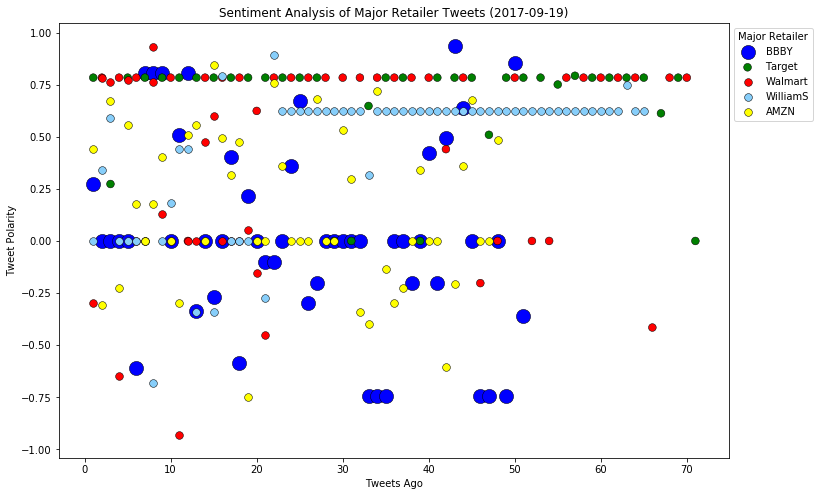

In [6]:

plt.figure(figsize=(12, 8))
plt.title("Sentiment Analysis of Major Retailer Tweets ("+str(datetime.now().date())+")")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")


p_bbby=plt.scatter(sentim_df["Tweets Ago"].loc[sentim_df["Major Retailer"]=="@BedBathBeyond"],
                  sentim_df["Compound"].loc[sentim_df["Major Retailer"]=="@BedBathBeyond"],
                  c="blue",alpha=1,linewidths=.5,edgecolor="black",s=200)

p_trgt=plt.scatter(            
             sentim_df["Tweets Ago"].loc[sentim_df["Major Retailer"]=="@Target"],
             sentim_df["Compound"].loc[sentim_df["Major Retailer"]=="@Target"],
             c="gr",alpha=1,linewidths=.5,edgecolor="black",s=60)


p_walm=plt.scatter(            
            sentim_df["Tweets Ago"].loc[sentim_df["Major Retailer"]=="@Walmart"],
            sentim_df["Compound"].loc[sentim_df["Major Retailer"]=="@Walmart"],
            c="red",alpha=1,linewidths=.5,edgecolor="black",s=60)

p_will=plt.scatter(            
            sentim_df["Tweets Ago"].loc[sentim_df["Major Retailer"]=="@WilliamsSonoma"],
            sentim_df["Compound"].loc[sentim_df["Major Retailer"]=="@WilliamsSonoma"],
            c="lightskyblue",alpha=1,linewidths=.5,edgecolor="black",s=60)

p_amzn=plt.scatter(            
            sentim_df["Tweets Ago"].loc[sentim_df["Major Retailer"]=="@amazon"],
            sentim_df["Compound"].loc[sentim_df["Major Retailer"]=="@amazon"],
            c="yellow",alpha=1,linewidths=.5,edgecolor="black",s=60)

plt.legend((p_bbby,p_trgt,p_walm,p_will,p_amzn),
           ("BBBY","Target","Walmart","WilliamS","AMZN"),title="Major Retailer",bbox_to_anchor=(1, 1))

plt.show()

In [7]:
sentim_avg_df=sentim_df.groupby(["Major Retailer"],as_index=False).mean()

In [8]:
sentim_avg_df

Major Retailer  Tweets Ago  Compound  Positive   Neutral  Negative
0   @BedBathBeyond        26.0  0.024933  0.093176  0.838804  0.068059
1          @Target        36.0  0.643704  0.248930  0.747155  0.003915
2         @Walmart        11.0  0.088452  0.095000  0.841571  0.063381
3  @WilliamsSonoma        33.0  0.441366  0.187138  0.796338  0.016523
4          @amazon        24.5  0.146894  0.099979  0.862062  0.037937

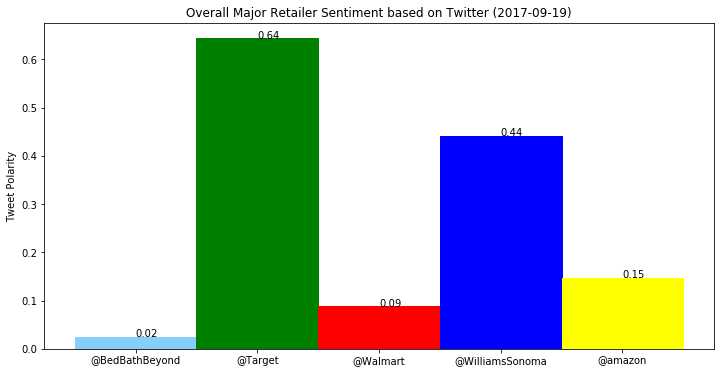

In [9]:
# Setting the positions and width for the bars

pos = list(range(len(sentim_avg_df['Compound']))) 
width = 1 

# Plotting the bars
fig, ax = plt.subplots(figsize=(12,6))

# Create a bar with pre_score data,
# in position pos,
news_bars=plt.bar(pos,         
         sentim_avg_df['Compound'], 
         width,
         alpha=1,
         label=sentim_avg_df['Major Retailer'][0])
news_bars[0].set_color('lightskyblue')
news_bars[1].set_color('green')
news_bars[2].set_color('red')
news_bars[3].set_color('blue')
news_bars[4].set_color('yellow')
ctr=0
for index, row in sentim_avg_df.iterrows():
    ax.text(ctr,row["Compound"],round(row["Compound"],2))
    ctr+=1

ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Major Retailer Sentiment based on Twitter ("+str(datetime.now().date())+")")
ax.set_xticks([p * width for p in pos])
ax.set_xticklabels(sentim_avg_df['Major Retailer'])

#Setting the x-axis and y-axis limits
#plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim([0, max(sentim_avg_df['Compound'])])


plt.show()

In [10]:
sentim_df.to_csv("./Resources/retail.csv")

In [11]:
sentim_df.loc[sentim_df["Major Retailer"]=="@Target"]

Major Retailer                                              Tweet  \
134        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
135        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
136        @Target  RT @Target: Open for a surprise. 😊 https://t.c...   
137        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
138        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
139        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
140        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
141        @Target  Came home to a gift from @target #redcard Pret...   
142        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
143        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
144        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
145        @Target  RT @Target: Where do pirates shop? #TalkLikeAP...   
146        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
147        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
148        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
149        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
150        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
151        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
152        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
153        @Target  RT @sandcrawlercast: To win one of these @Targ...   
154        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
155        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
156        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
157        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
158        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
159        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
160        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
161        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
162        @Target  RT @TargetNews: This is not a drill: @rihanna’...   
163        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
..             ...                                                ...   
175        @Target  Halloween #TargetRunAndDone ✅ Thanks to today'...   
176        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
177        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
178        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
179        @Target  @Target order item online $29.99 &amp; get cha...   
180        @Target  A single cobalt 💙 chair...⠀\nThis is probably ...   
181        @Target  RT @Target: Where do pirates shop? #TalkLikeAP...   
182        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
183        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
184        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
185        @Target  @Target Now we know where Captain Jack Sparrow...   
186        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
187        @Target  You can now buy a #smartwaterbottle at @Target...   
188        @Target  Pizza &amp; resumes, what a perfect pair. Tomo...   
189        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
190        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
191        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
192        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
193        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
194        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
195        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
196        @Target  RT @OriginalFunko: RT &amp; follow @OriginalFu...   
197        @Target  RT @OriginalFunko: RT &amp; follow @Origin